# Imports

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

# Read data

In [20]:
df = pd.read_csv('final.csv')
df

,DateTime,RMSSD,User Name,Air Qualityall Good,Beverage,Cloth 1,Cloth 2,Cloth 3,Cloth 4,Cloth 5,...,Location_LD106,Location_LD124,Location_LD323,Location_LD328,Humidity,Temperature,TemperatureF,Light,eCO2,TVOC
0,2022-12-12 13:28:19,30.287191,Noah@email.com,1.0,2.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,35.5,21.4,70.52,1106.0,530.0,19.0
1,2022-12-12 13:28:43,103.473443,job@email.com,1.0,2.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,35.5,21.4,70.52,1106.0,530.0,19.0
2,2022-12-12 13:31:19,25.434576,Noah@email.com,1.0,2.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,35.5,21.4,70.52,992.0,584.0,28.0
3,2022-12-12 13:34:52,26.282239,Noah@email.com,1.0,2.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,35.6,21.4,70.52,1118.0,589.0,28.0
4,2022-12-12 13:39:23,31.830500,Noah@email.com,1.0,2.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,35.7,21.5,70.70,1115.0,2018.0,779.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,2022-12-21 09:51:26,48.399884,niek@email.com,1.0,2.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,51.2,19.3,66.74,517.0,400.0,0.0
340,2022-12-21 10:03:19,21.022294,job@email.com,1.0,2.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,50.8,19.5,67.10,527.0,408.0,1.0
341,2022-12-21 10:03:24,65.526135,niek@email.com,1.0,2.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,50.9,19.5,67.10,524.0,408.0,1.0
342,2022-12-21 10:13:14,42.613233,niek@email.com,1.0,2.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,50.9,19.5,67.10,518.0,406.0,0.0


<AxesSubplot:>

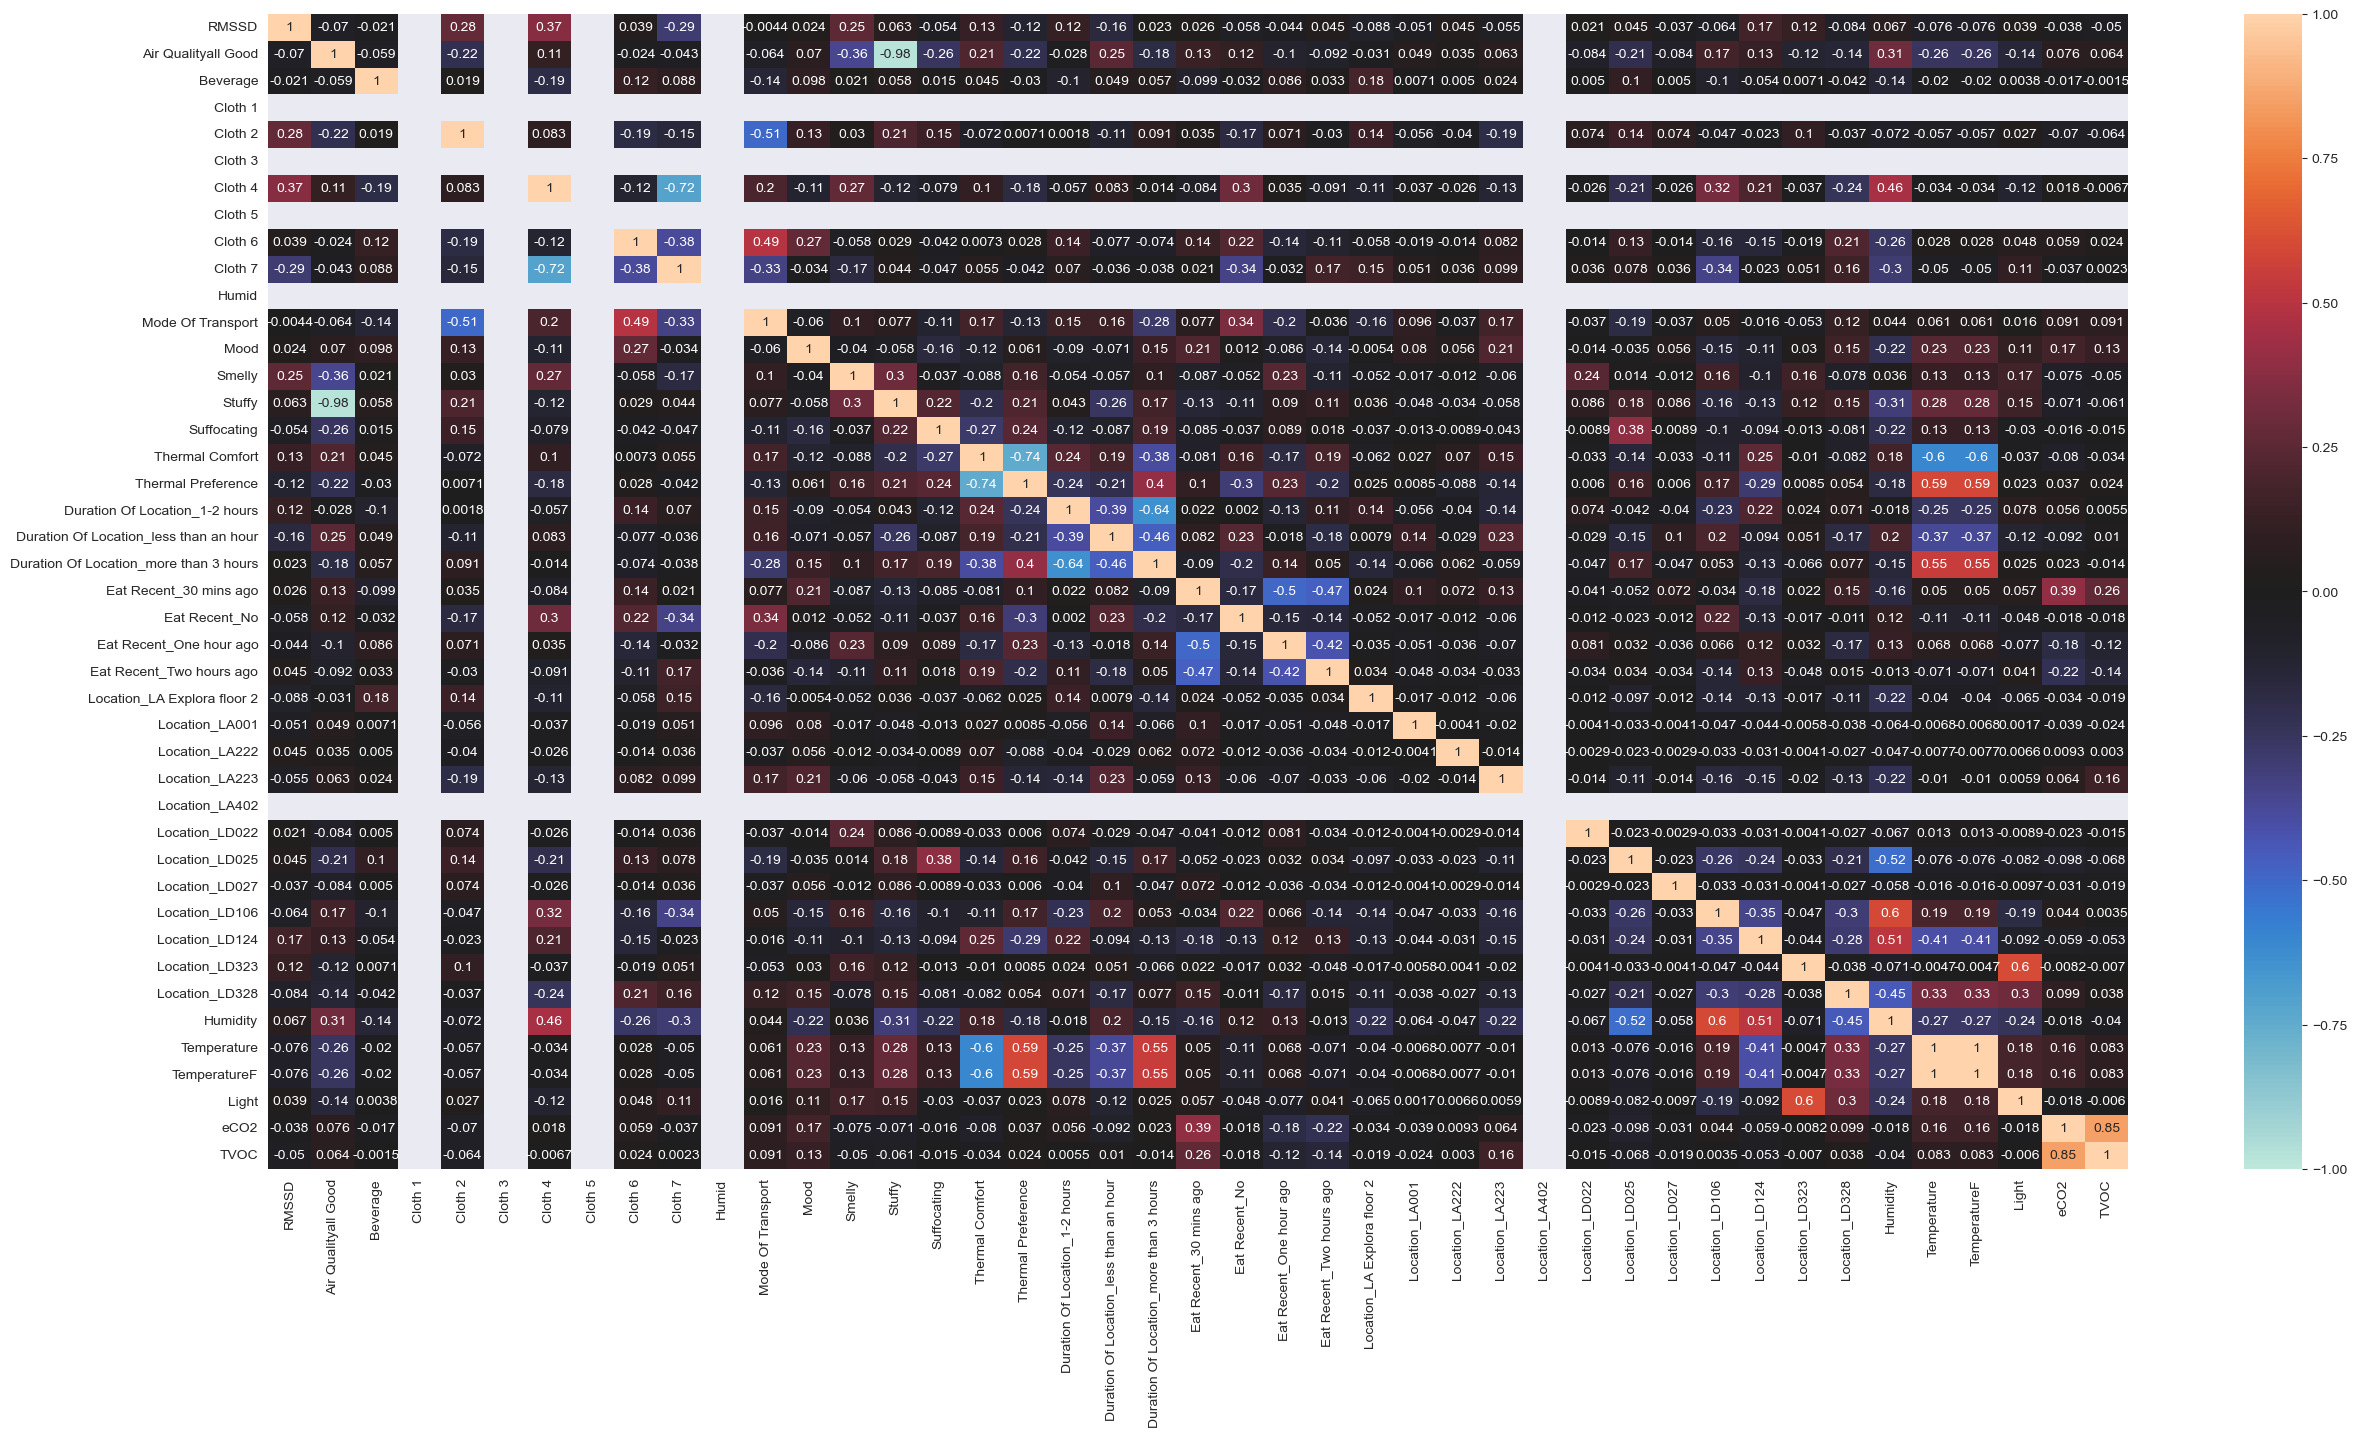

In [21]:
plt.figure(figsize=(30, 15))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=0)

## Bivariate analysis vs thermal comfort

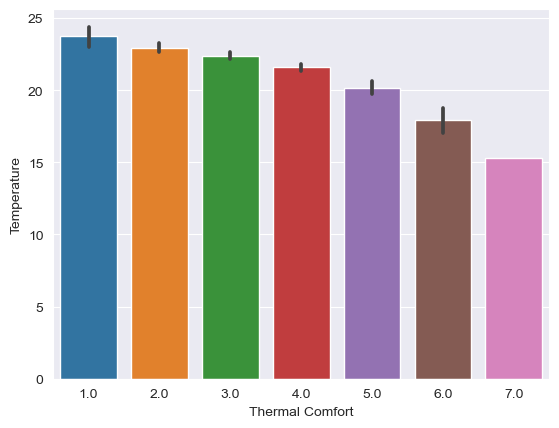

In [22]:
sns.barplot(y="Temperature", x="Thermal Comfort", data=df);

So there is a strong correlation between thermal comfort and temperature, let's use Thermal comfort as our target and look at the correlations with other features.

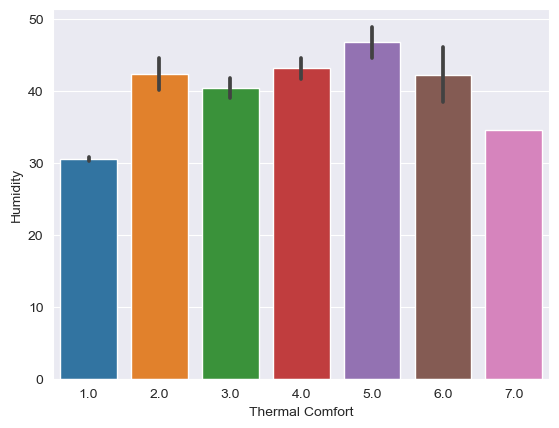

In [23]:
sns.barplot(y="Humidity", x="Thermal Comfort", data=df);

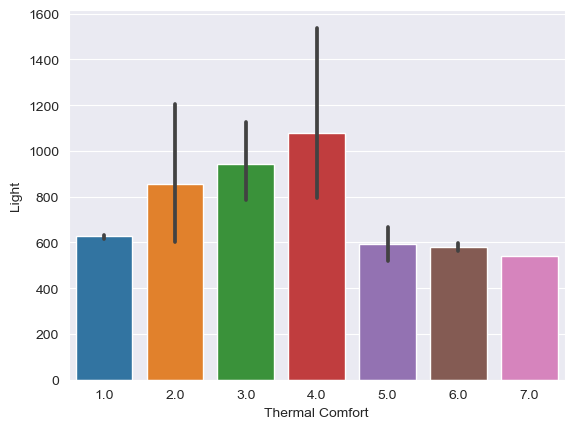

In [24]:
sns.barplot(y="Light", x="Thermal Comfort", data=df);

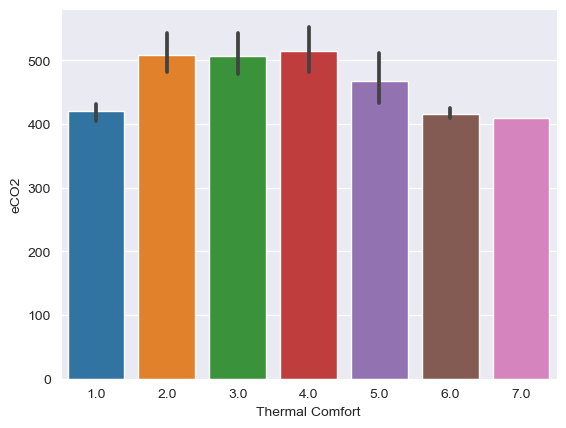

In [25]:
sns.barplot(y="eCO2", x="Thermal Comfort", data=df);

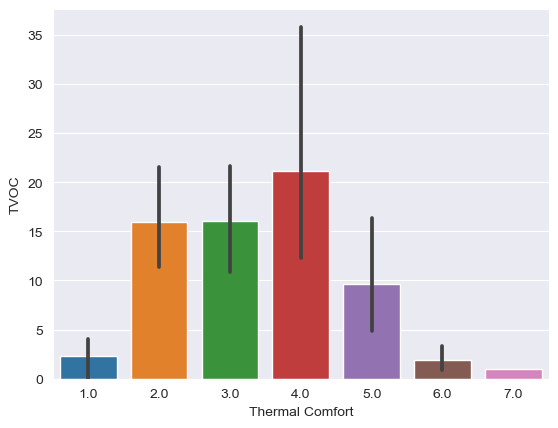

In [26]:
sns.barplot(y="TVOC", x="Thermal Comfort", data=df);

## Bivariate analysis vs HRV

In [27]:
data_job = df[df['User Name']=='Noah@email.com']
data_job
# sns.barplot(y="RMSSD", x="Thermal Comfort", data=df[['User Name' == "niek@email.com"]]);

,DateTime,RMSSD,User Name,Air Qualityall Good,Beverage,Cloth 1,Cloth 2,Cloth 3,Cloth 4,Cloth 5,...,Location_LD106,Location_LD124,Location_LD323,Location_LD328,Humidity,Temperature,TemperatureF,Light,eCO2,TVOC
0,2022-12-12 13:28:19,30.287191,Noah@email.com,1.0,2.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,35.5,21.4,70.52,1106.0,530.0,19.0
2,2022-12-12 13:31:19,25.434576,Noah@email.com,1.0,2.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,35.5,21.4,70.52,992.0,584.0,28.0
3,2022-12-12 13:34:52,26.282239,Noah@email.com,1.0,2.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,35.6,21.4,70.52,1118.0,589.0,28.0
4,2022-12-12 13:39:23,31.830500,Noah@email.com,1.0,2.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,35.7,21.5,70.70,1115.0,2018.0,779.0
6,2022-12-12 13:49:53,38.763914,Noah@email.com,1.0,2.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,35.8,21.5,70.70,906.0,400.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,2022-12-20 14:16:58,105.056440,Noah@email.com,0.0,2.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,48.4,24.0,75.20,535.0,400.0,0.0
328,2022-12-20 14:18:30,82.172059,Noah@email.com,0.0,2.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,48.4,24.0,75.20,535.0,400.0,0.0
330,2022-12-20 14:26:34,183.737538,Noah@email.com,0.0,2.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,48.6,23.4,74.12,525.0,405.0,0.0
333,2022-12-20 14:29:13,41.156551,Noah@email.com,0.0,2.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,48.7,23.2,73.76,523.0,415.0,2.0


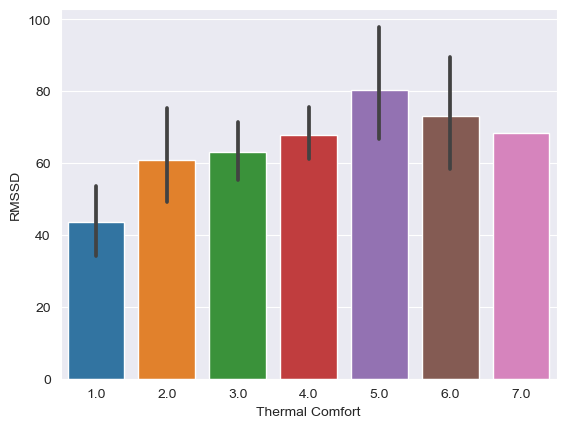

In [28]:
sns.barplot(y="RMSSD", x="Thermal Comfort", data=df);

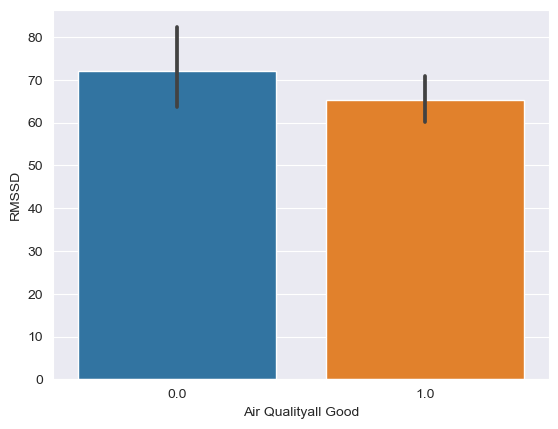

In [29]:
sns.barplot(y="RMSSD", x="Air Qualityall Good", data=df);

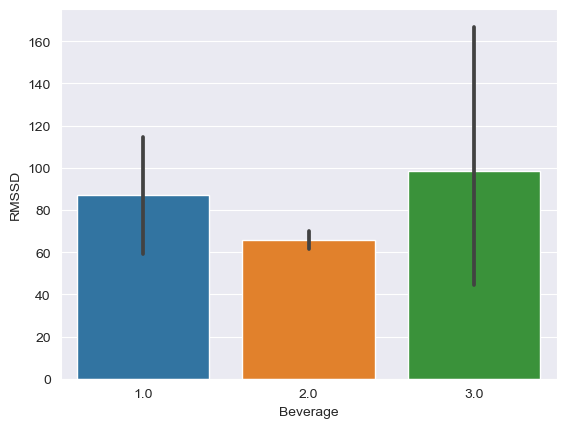

In [30]:
sns.barplot(y="RMSSD", x="Beverage", data=df);

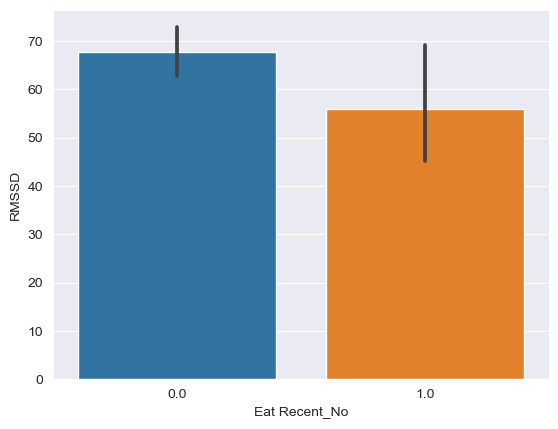

In [31]:
sns.barplot(y="RMSSD", x="Eat Recent_No", data=df);

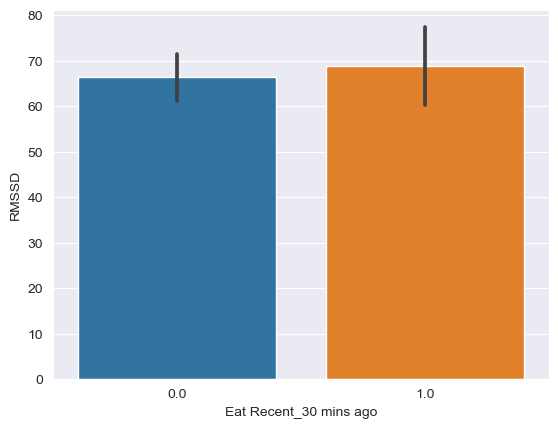

In [32]:
sns.barplot(y="RMSSD", x="Eat Recent_30 mins ago", data=df);

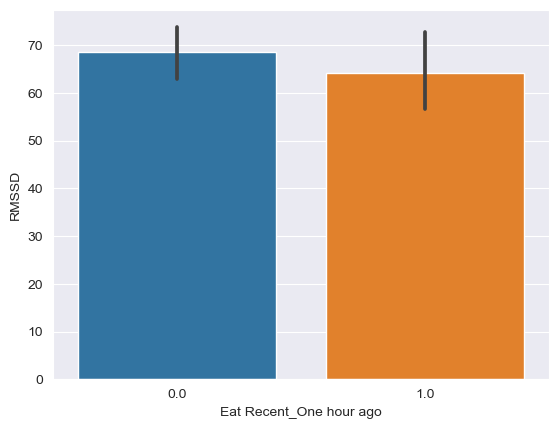

In [33]:
sns.barplot(y="RMSSD", x="Eat Recent_One hour ago", data=df);

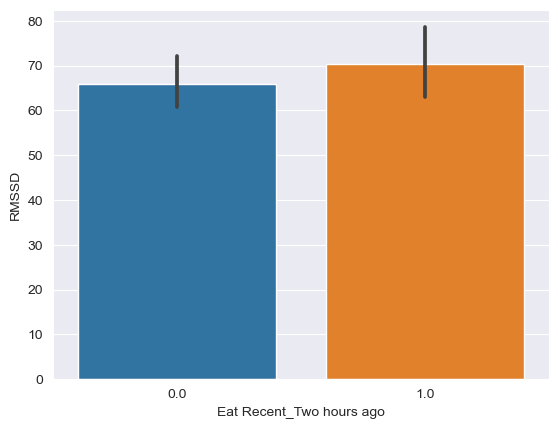

In [34]:
sns.barplot(y="RMSSD", x="Eat Recent_Two hours ago", data=df);

In [35]:
df = df[['RMSSD','Air Qualityall Good', 'Beverage', 'Mode Of Transport','Mood','Stuffy','Thermal Preference','Thermal Comfort', '' ]]

KeyError: "[''] not in index"

In [ ]:
sns.scatterplot(data=data_job, x="Temperature", y="RMSSD")